In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90248768a0a098f47e4d21e962f4c636


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | awjilah
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kandrian
Processing Record 5 of Set 1 | sydney
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | yerbogachen
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | wilmington
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | lasa
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | ipinda
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nome
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | niquero
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | wanxian
Processing Record 21 of Set 1 | itainopolis
Processing Record 22 of Set 1 | ust-tsilma
Processing Record 23 of Set 1 | cape to

Processing Record 39 of Set 4 | mildura
Processing Record 40 of Set 4 | christchurch
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | finschhafen
Processing Record 43 of Set 4 | lakes entrance
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | baiyin
Processing Record 46 of Set 4 | plouzane
Processing Record 47 of Set 4 | chengde
Processing Record 48 of Set 4 | nikki
Processing Record 49 of Set 4 | jacqueville
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | lompoc
Processing Record 3 of Set 5 | sale
Processing Record 4 of Set 5 | dwarka
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | arecibo
Processing Record 7 of Set 5 | kuching
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | saint-georges
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | chokurdakh
Processing Rec

Processing Record 30 of Set 8 | puri
Processing Record 31 of Set 8 | utiroa
City not found. Skipping...
Processing Record 32 of Set 8 | monrovia
Processing Record 33 of Set 8 | churapcha
Processing Record 34 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 35 of Set 8 | luanda
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | amazar
Processing Record 38 of Set 8 | alta floresta
Processing Record 39 of Set 8 | khani
Processing Record 40 of Set 8 | banjar
Processing Record 41 of Set 8 | sena madureira
Processing Record 42 of Set 8 | pirot
Processing Record 43 of Set 8 | sault sainte marie
Processing Record 44 of Set 8 | riyadh
Processing Record 45 of Set 8 | qostanay
Processing Record 46 of Set 8 | aden
Processing Record 47 of Set 8 | kargat
Processing Record 48 of Set 8 | kijang
Processing Record 49 of Set 8 | san jose
Processing Record 50 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 1 of Set 9 | flin flon
Processing Re

Processing Record 14 of Set 12 | bolonchen
City not found. Skipping...
Processing Record 15 of Set 12 | dinsor
City not found. Skipping...
Processing Record 16 of Set 12 | ahipara
Processing Record 17 of Set 12 | agua verde
Processing Record 18 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 19 of Set 12 | dillon
Processing Record 20 of Set 12 | champerico
Processing Record 21 of Set 12 | alibag
Processing Record 22 of Set 12 | ouro preto do oeste
Processing Record 23 of Set 12 | alyangula
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | mayachnyy
Processing Record 26 of Set 12 | yaan
Processing Record 27 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 28 of Set 12 | berezovyy
Processing Record 29 of Set 12 | trinidad
Processing Record 30 of Set 12 | kolpashevo
Processing Record 31 of Set 12 | sangar
Processing Record 32 of Set 12 | atasu
Processing Record 33 of Set 12 | kedainiai
Processing Record 34 of Set 12 | narsaq
Proc

In [14]:
len(city_data)

567

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,70.21,51,10,6.46,MX,2021-04-20 17:13:09
1,Awjilah,29.1081,21.2869,73.26,17,7,11.21,LY,2021-04-20 17:13:10
2,Mataura,-46.1927,168.8643,52.00,81,33,7.00,NZ,2021-04-20 17:13:10
3,Kandrian,-6.2167,149.5500,77.20,90,68,6.06,PG,2021-04-20 17:13:11
4,Sydney,-33.8679,151.2073,60.01,58,3,10.36,AU,2021-04-20 17:12:59
5,Mar Del Plata,-38.0023,-57.5575,77.00,78,75,16.11,AR,2021-04-20 17:08:23
6,Yerbogachen,61.2767,108.0108,19.65,93,100,6.76,RU,2021-04-20 17:13:12
7,Punta Arenas,-53.1500,-70.9167,50.00,53,40,20.71,CL,2021-04-20 17:13:12
8,Wilmington,34.2257,-77.9447,71.60,33,1,11.50,US,2021-04-20 17:12:31
9,Saint George,37.1041,-113.5841,66.00,17,1,3.44,US,2021-04-20 17:13:13


In [16]:
# Re-order columns of the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2021-04-20 17:13:09,27.9769,-114.0611,70.21,51,10,6.46
1,Awjilah,LY,2021-04-20 17:13:10,29.1081,21.2869,73.26,17,7,11.21
2,Mataura,NZ,2021-04-20 17:13:10,-46.1927,168.8643,52.00,81,33,7.00
3,Kandrian,PG,2021-04-20 17:13:11,-6.2167,149.5500,77.20,90,68,6.06
4,Sydney,AU,2021-04-20 17:12:59,-33.8679,151.2073,60.01,58,3,10.36
5,Mar Del Plata,AR,2021-04-20 17:08:23,-38.0023,-57.5575,77.00,78,75,16.11
6,Yerbogachen,RU,2021-04-20 17:13:12,61.2767,108.0108,19.65,93,100,6.76
7,Punta Arenas,CL,2021-04-20 17:13:12,-53.1500,-70.9167,50.00,53,40,20.71
8,Wilmington,US,2021-04-20 17:12:31,34.2257,-77.9447,71.60,33,1,11.50
9,Saint George,US,2021-04-20 17:13:13,37.1041,-113.5841,66.00,17,1,3.44


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

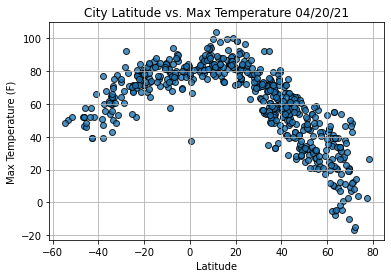

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

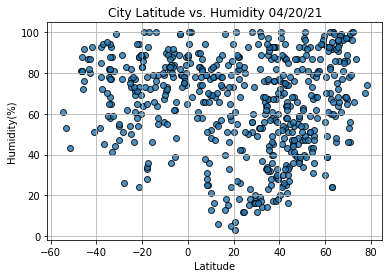

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()